In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
gold_data = pd.read_csv('/content/gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_data.shape

(2290, 6)

In [8]:
gold_data.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [9]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
Correlation = gold_data.corr()

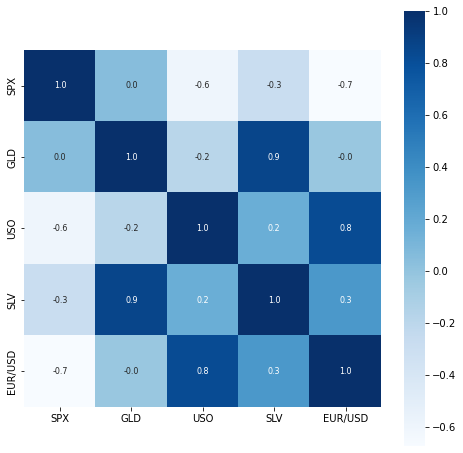

In [16]:
plt.figure(figsize = (8,8))
sns.heatmap( Correlation , cbar=True, square = True, fmt = '.1f', annot = True, annot_kws={'size': 8}, cmap = 'Blues' )

In [17]:
print(Correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


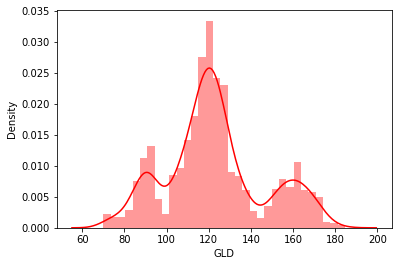

In [18]:
 sns.distplot(gold_data['GLD'],color='red')

In [20]:
#Splitting features(Date)
X = gold_data.drop(['Date','GLD'], axis = 1)
Y = gold_data['GLD']

In [22]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [24]:
X_train,X_test ,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 2)

In [25]:
regressor = RandomForestRegressor(n_estimators=100)

In [26]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [27]:
test_data_pred = regressor.predict(X_test)

In [28]:
print(test_data_pred)

[168.45919939  81.96469958 116.19680008 127.6480009  120.78710148
 154.66459774 150.39289865 126.15449997 117.42999872 126.11020014
 116.73450074 171.9946005  141.52829867 167.85579852 115.23149965
 117.53830048 138.68640306 170.19870094 159.86550316 159.47169898
 155.21890022 125.08870017 175.99170009 157.23160266 125.1235004
  93.90809989  76.92970015 120.66120002 119.11399929 167.37829954
  88.20780038 125.19600042  90.96940067 117.78479993 121.15859923
 135.84310095 115.39690127 115.05600071 148.21029934 107.2856013
 104.85110253  87.23599796 126.49930045 117.7359994  154.82449921
 119.66220003 108.27680049 107.99199837  93.10020019 127.24919745
  74.31390034 113.71209926 121.29169995 111.3160991  118.90859876
 120.811299   159.98779933 169.56680147 146.72209625  85.87519845
  94.30140044  86.8070989   90.62259999 119.10750047 126.50860076
 127.50669985 168.85059976 122.23549903 117.29799896  98.42220021
 168.41010209 143.14329794 132.0269024  121.08500248 120.35929941
 119.7437001

In [29]:
RSE = metrics.r2_score(Y_test, test_data_pred)
print(RSE)

0.9892801172702802


In [30]:
Y_test = list(Y_test)

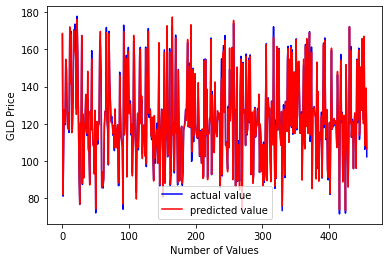

In [32]:
plt.plot(Y_test , color = 'blue', label = 'actual value')
plt.plot(test_data_pred , color = 'red', label = 'predicted value')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()